In [ ]:
from google.colab import files
files.upload()

Saving 1.txt to 1.txt
Saving 3.txt to 3.txt
Saving 4.txt to 4.txt
Saving 6.txt to 6.txt


{'1.txt': b'6.458764324991119\r\n-20.83865973066699\r\n-2.6277477737333954\r\n-8.774277708461005\r\n-14.44531408086988\r\n-13.195988971539219\r\n-20.3467458498448\r\n-6.207681189811481\r\n-1.9884183197445187\r\n-9.558151259573286\r\n14.840196846374802\r\n0.899200885968499\r\n-11.982576749126048\r\n-4.93982094722905\r\n-14.21695825880941\r\n-3.322508278243782\r\n-7.049372385854885\r\n-2.876176292869126\r\n-9.743613106591804\r\n-2.6183848791368525\r\n1.2460132337334384\r\n6.429355647899158\r\n-2.244189191390096\r\n-13.30797504790716\r\n1.898938390769989\r\n8.899087143385817\r\n-22.127601743456776\r\n1.5344223303999156\r\n-3.625762239620085\r\n7.128773397225203\r\n4.105484211461132\r\n5.7632925332336615\r\n',
 '3.txt': b'1.077790638277834\r\n0.684396161776633\r\n4.892141714911393\r\n1.5671522034739442\r\n0.14129853597953884\r\n5.001938358792881\r\n0.6232036366611746\r\n3.5170506594675106\r\n1.8655468281639849\r\n0.24232936306785877\r\n5.388893905415869\r\n4.116916027783428\r\n3.9803880843

In [ ]:
with open('1.txt', 'r') as file:
    data1 = file.readlines()
    data1 = [float(line.strip()) for line in data1]
print(data1)

with open('4.txt', 'r') as file:
    data4 = file.readlines()
    data4 = [float(line.strip()) for line in data4]
print(data4)

with open('3.txt', 'r') as file:
    data3 = file.readlines()
    data3 = [float(line.strip()) for line in data3]
print(data3)

with open('6.txt', 'r') as file:
    data6 = file.readlines()
    data6 = [float(line.strip()) for line in data6]
print(data6)

[6.458764324991119, -20.83865973066699, -2.6277477737333954, -8.774277708461005, -14.44531408086988, -13.195988971539219, -20.3467458498448, -6.207681189811481, -1.9884183197445187, -9.558151259573286, 14.840196846374802, 0.899200885968499, -11.982576749126048, -4.93982094722905, -14.21695825880941, -3.322508278243782, -7.049372385854885, -2.876176292869126, -9.743613106591804, -2.6183848791368525, 1.2460132337334384, 6.429355647899158, -2.244189191390096, -13.30797504790716, 1.898938390769989, 8.899087143385817, -22.127601743456776, 1.5344223303999156, -3.625762239620085, 7.128773397225203, 4.105484211461132, 5.7632925332336615]
[0.2906411478876903, 5.466837183236006, 4.767810402510789, 2.1093614236785605, 0.8059080185165881, -1.145209943231358, -5.042871267960545, 3.3303060831598015, 0.061761410046920595, 0.3617666721363665, 0.7940333447828892, -3.6228936993538037, 3.6106627363681545, 1.6559190994749224, -0.733758056201882, 4.054170129938704, 0.4792758107043352, 3.2019645906318517, 3

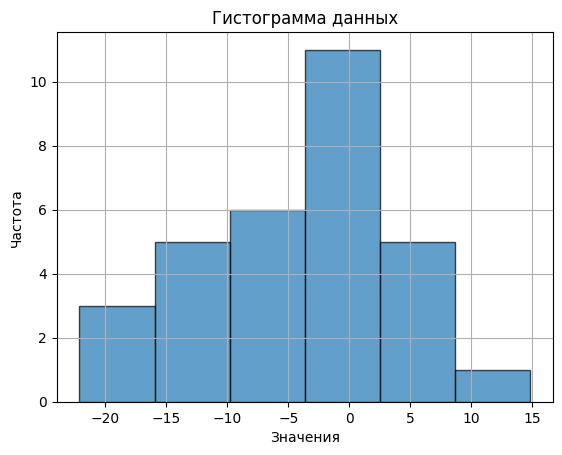

Значение критерия Пирсона: χ² = 2.5209
Критическое значение χ² для уровня значимости α = 0.05 и 3 степеней свободы: 7.8147
Нет оснований отвергнуть нулевую гипотезу о нормальном распределении.

       Интервал    ni (наблюд.)     Pi (вероятность)  nPi (теор. частота)        (ni - nPi)^2 / nPi
    -22.13 - -15.97              3              0.07486               2.3956                    0.1525
    -15.97 - -9.81               5              0.17221               5.5108                    0.0473
     -9.81 - -3.64               6              0.25534               8.1709                    0.5768
     -3.64 - 2.52               11              0.24409               7.8110                    1.3020
      2.52 - 8.68                5              0.15044               4.8140                    0.0072
      8.68 - 14.84               1              0.05975               1.9121                    0.4351


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2

with open('1.txt', 'r') as file:
    data1 = file.readlines()
    data1 = [float(line.strip()) for line in data1]

def calculate_intervals_and_frequencies(data, num_intervals=None):
    if num_intervals is None:
        num_intervals = int(1 + 3.322 * np.log10(len(data)))

    min_val, max_val = min(data), max(data)
    interval_width = (max_val - min_val) / num_intervals
    intervals = [min_val + i * interval_width for i in range(num_intervals + 1)]

    hist, bin_edges = np.histogram(data, bins=intervals)

    relative_freq = hist / len(data)

    return intervals, hist, relative_freq, bin_edges

intervals, absolute_freq, relative_freq, bin_edges = calculate_intervals_and_frequencies(data1)

plt.hist(data1, bins=bin_edges, edgecolor='black', alpha=0.7)
plt.title('Гистограмма данных')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

def calculate_theoretical_frequencies(data, intervals):
    mu, sigma = np.mean(data), np.std(data, ddof=1)
    n = len(data)
    theoretical_freq = []
    probabilities = []

    for i in range(len(intervals) - 1):
        p_i = norm.cdf(intervals[i+1], loc=mu, scale=sigma) - norm.cdf(intervals[i], loc=mu, scale=sigma)
        theoretical_freq.append(n * p_i)
        probabilities.append(p_i)

    return theoretical_freq, probabilities

theoretical_freq, probabilities = calculate_theoretical_frequencies(data1, intervals)

def chi_square_test(observed, expected):
    chi_square = sum((o - e) ** 2 / e for o, e in zip(observed, expected) if e != 0)
    return chi_square

chi_square_value = chi_square_test(absolute_freq, theoretical_freq)
alpha = 0.05
df = len(absolute_freq) - 1 - 2
chi_square_critical = chi2.ppf(1 - alpha, df)


print(f"Значение критерия Пирсона: χ² = {chi_square_value:.4f}")
print(f"Критическое значение χ² для уровня значимости α = {alpha} и {df} степеней свободы: {chi_square_critical:.4f}")

if chi_square_value > chi_square_critical:
    print("Нулевая гипотеза о нормальном распределении отвергается.")
else:
    print("Нет оснований отвергнуть нулевую гипотезу о нормальном распределении.")

print(f"\n{'Интервал':>15} {'ni (наблюд.)':>15} {'Pi (вероятность)':>20} {'nPi (теор. частота)':>20} {'(ni - nPi)^2 / nPi':>25}")
chi_square_parts = []

for i in range(len(absolute_freq)):
    ni = absolute_freq[i]
    nPi = theoretical_freq[i]
    Pi = probabilities[i]
    chi_square_component = (ni - nPi) ** 2 / nPi if nPi != 0 else 0
    chi_square_parts.append(chi_square_component)
    print(f"{bin_edges[i]:>10.2f} - {bin_edges[i+1]:<10.2f} {ni:>10} {Pi:>20.5f} {nPi:>20.4f} {chi_square_component:>25.4f}")




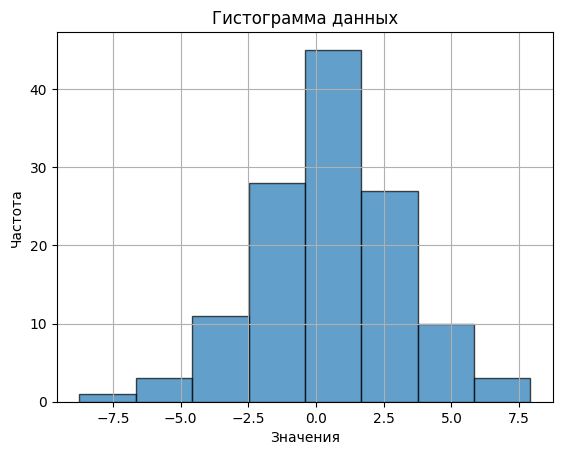

Значение критерия Пирсона: χ² = 2.5926
Критическое значение χ² для уровня значимости α = 0.05 и 5 степеней свободы: 11.0705
Нет оснований отвергнуть нулевую гипотезу о нормальном распределении.

       Интервал    ni (наблюд.)     Pi (вероятность)  nPi (теор. частота)        (ni - nPi)^2 / nPi
     -8.74 - -6.66               1              0.00355               0.4545                    0.6547
     -6.66 - -4.58               3              0.02510               3.2132                    0.0141
     -4.58 - -2.50              11              0.10075              12.8963                    0.2788
     -2.50 - -0.41              28              0.23004              29.4448                    0.0709
     -0.41 - 1.67               45              0.29917              38.2936                    1.1745
      1.67 - 3.75               27              0.22172              28.3799                    0.0671
      3.75 - 5.83               10              0.09359              11.9797           

In [ ]:

with open('4.txt', 'r') as file:
    data1 = file.readlines()
    data1 = [float(line.strip()) for line in data1]


def calculate_intervals_and_frequencies(data, num_intervals=None):
    if num_intervals is None:
        num_intervals = int(1 + 3.322 * np.log10(len(data)))

    min_val, max_val = min(data), max(data)
    interval_width = (max_val - min_val) / num_intervals
    intervals = [min_val + i * interval_width for i in range(num_intervals + 1)]

    hist, bin_edges = np.histogram(data, bins=intervals)

    relative_freq = hist / len(data)

    return intervals, hist, relative_freq, bin_edges

intervals, absolute_freq, relative_freq, bin_edges = calculate_intervals_and_frequencies(data1)

plt.hist(data1, bins=bin_edges, edgecolor='black', alpha=0.7)
plt.title('Гистограмма данных')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

def calculate_theoretical_frequencies(data, intervals):
    mu, sigma = np.mean(data), np.std(data, ddof=1)
    n = len(data)
    theoretical_freq = []
    probabilities = []

    for i in range(len(intervals) - 1):
        p_i = norm.cdf(intervals[i+1], loc=mu, scale=sigma) - norm.cdf(intervals[i], loc=mu, scale=sigma)
        theoretical_freq.append(n * p_i)
        probabilities.append(p_i)

    return theoretical_freq, probabilities

theoretical_freq, probabilities = calculate_theoretical_frequencies(data1, intervals)


def chi_square_test(observed, expected):
    chi_square = sum((o - e) ** 2 / e for o, e in zip(observed, expected) if e != 0)
    return chi_square

chi_square_value = chi_square_test(absolute_freq, theoretical_freq)


alpha = 0.05
df = len(absolute_freq) - 1 - 2
chi_square_critical = chi2.ppf(1 - alpha, df)

print(f"Значение критерия Пирсона: χ² = {chi_square_value:.4f}")
print(f"Критическое значение χ² для уровня значимости α = {alpha} и {df} степеней свободы: {chi_square_critical:.4f}")

if chi_square_value > chi_square_critical:
    print("Нулевая гипотеза о нормальном распределении отвергается.")
else:
    print("Нет оснований отвергнуть нулевую гипотезу о нормальном распределении.")
print(f"\n{'Интервал':>15} {'ni (наблюд.)':>15} {'Pi (вероятность)':>20} {'nPi (теор. частота)':>20} {'(ni - nPi)^2 / nPi':>25}")
chi_square_parts = []

for i in range(len(absolute_freq)):
    ni = absolute_freq[i]
    nPi = theoretical_freq[i]
    Pi = probabilities[i]
    chi_square_component = (ni - nPi) ** 2 / nPi if nPi != 0 else 0
    chi_square_parts.append(chi_square_component)
    print(f"{bin_edges[i]:>10.2f} - {bin_edges[i+1]:<10.2f} {ni:>10} {Pi:>20.5f} {nPi:>20.4f} {chi_square_component:>25.4f}")

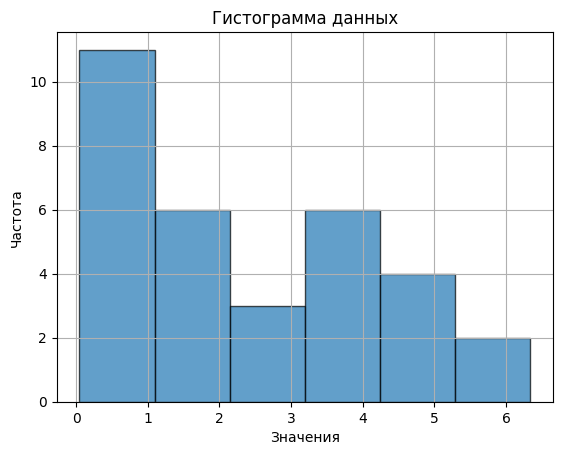

Значение критерия Пирсона для экспоненциального распределения: χ² = 6.6886
Критическое значение χ² для уровня значимости α = 0.05 и 4 степеней свободы: 9.4877
Нет оснований отвергнуть нулевую гипотезу о экспоненциальном распределении.

       Интервал    ni (наблюд.)     Pi (вероятность)  nPi (теор. частота)        (ni - nPi)^2 / nPi
      0.05 - 1.10               11              0.35188              11.2602                    0.0060
      1.10 - 2.14                6              0.22563               7.2201                    0.2062
      2.14 - 3.19                3              0.14467               4.6296                    0.5736
      3.19 - 4.24                6              0.09277               2.9685                    3.0957
      4.24 - 5.29                4              0.05948               1.9034                    2.3092
      5.29 - 6.34                2              0.03814               1.2205                    0.4978


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, expon

with open('3.txt', 'r') as file:
    data1 = file.readlines()
    data1 = [float(line.strip()) for line in data1]


def calculate_intervals_and_frequencies(data, num_intervals=None):
    if num_intervals is None:
        num_intervals = int(1 + 3.322 * np.log10(len(data)))


    min_val, max_val = min(data), max(data)
    interval_width = (max_val - min_val) / num_intervals
    intervals = [min_val + i * interval_width for i in range(num_intervals + 1)]


    hist, bin_edges = np.histogram(data, bins=intervals)


    relative_freq = hist / len(data)

    return intervals, hist, relative_freq, bin_edges


intervals, absolute_freq, relative_freq, bin_edges = calculate_intervals_and_frequencies(data1)

plt.hist(data1, bins=bin_edges, edgecolor='black', alpha=0.7)
plt.title('Гистограмма данных')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


def calculate_theoretical_frequencies_exponential(data, intervals):
    lambd = 1 / np.mean(data)
    n = len(data)
    theoretical_freq = []
    probabilities = []

    for i in range(len(intervals) - 1):

        p_i = (expon.cdf(intervals[i+1], scale=1/lambd) - expon.cdf(intervals[i], scale=1/lambd))
        theoretical_freq.append(n * p_i)
        probabilities.append(p_i)

    return theoretical_freq, probabilities

theoretical_freq_exp, probabilities_exp = calculate_theoretical_frequencies_exponential(data1, intervals)


def chi_square_test(observed, expected):
    chi_square = sum((o - e) ** 2 / e for o, e in zip(observed, expected) if e != 0)
    return chi_square

chi_square_value_exp = chi_square_test(absolute_freq, theoretical_freq_exp)


alpha = 0.05
df = len(absolute_freq) - 1 - 1

chi_square_critical_exp = chi2.ppf(1 - alpha, df)


print(f"Значение критерия Пирсона для экспоненциального распределения: χ² = {chi_square_value_exp:.4f}")
print(f"Критическое значение χ² для уровня значимости α = {alpha} и {df} степеней свободы: {chi_square_critical_exp:.4f}")

if chi_square_value_exp > chi_square_critical_exp:
    print("Нулевая гипотеза о экспоненциальном распределении отвергается.")
else:
    print("Нет оснований отвергнуть нулевую гипотезу о экспоненциальном распределении.")


print(f"\n{'Интервал':>15} {'ni (наблюд.)':>15} {'Pi (вероятность)':>20} {'nPi (теор. частота)':>20} {'(ni - nPi)^2 / nPi':>25}")
chi_square_parts_exp = []

for i in range(len(absolute_freq)):
    ni = absolute_freq[i]
    nPi = theoretical_freq_exp[i]
    Pi = probabilities_exp[i]
    chi_square_component = (ni - nPi) ** 2 / nPi if nPi != 0 else 0
    chi_square_parts_exp.append(chi_square_component)
    print(f"{bin_edges[i]:>10.2f} - {bin_edges[i+1]:<10.2f} {ni:>10} {Pi:>20.5f} {nPi:>20.4f} {chi_square_component:>25.4f}")


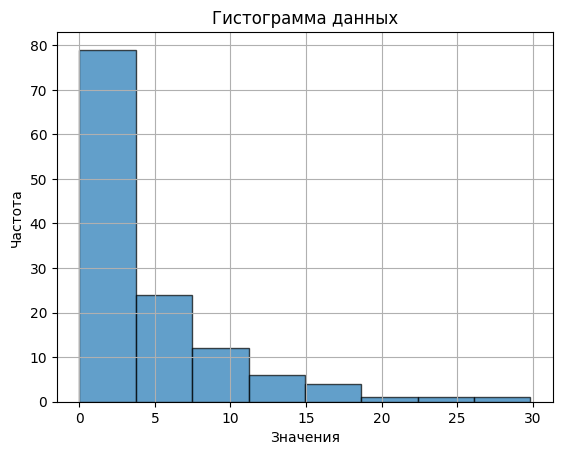

Значение критерия Пирсона для экспоненциального распределения: χ² = 6.3535
Критическое значение χ² для уровня значимости α = 0.05 и 6 степеней свободы: 12.5916
Нет оснований отвергнуть нулевую гипотезу о экспоненциальном распределении.

       Интервал    ni (наблюд.)     Pi (вероятность)  nPi (теор. частота)        (ni - nPi)^2 / nPi
      0.00 - 3.73               79              0.55641              71.2210                    0.8496
      3.73 - 7.46               24              0.24681              31.5920                    1.8245
      7.46 - 11.20              12              0.10948              14.0135                    0.2893
     11.20 - 14.93               6              0.04856               6.2160                    0.0075
     14.93 - 18.66               4              0.02154               2.7573                    0.5601
     18.66 - 22.39               1              0.00956               1.2231                    0.0407
     22.39 - 26.12               1           

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, expon


with open('6.txt', 'r') as file:
    data1 = file.readlines()
    data1 = [float(line.strip()) for line in data1]


def calculate_intervals_and_frequencies(data, num_intervals=None):

    if num_intervals is None:
        num_intervals = int(1 + 3.322 * np.log10(len(data)))


    min_val, max_val = min(data), max(data)
    interval_width = (max_val - min_val) / num_intervals
    intervals = [min_val + i * interval_width for i in range(num_intervals + 1)]


    hist, bin_edges = np.histogram(data, bins=intervals)


    relative_freq = hist / len(data)

    return intervals, hist, relative_freq, bin_edges


intervals, absolute_freq, relative_freq, bin_edges = calculate_intervals_and_frequencies(data1)

а
plt.hist(data1, bins=bin_edges, edgecolor='black', alpha=0.7)
plt.title('Гистограмма данных')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


def calculate_theoretical_frequencies_exponential(data, intervals):
    lambd = 1 / np.mean(data)
    n = len(data)
    theoretical_freq = []
    probabilities = []

    for i in range(len(intervals) - 1):

        p_i = (expon.cdf(intervals[i+1], scale=1/lambd) - expon.cdf(intervals[i], scale=1/lambd))
        theoretical_freq.append(n * p_i)
        probabilities.append(p_i)

    return theoretical_freq, probabilities


theoretical_freq_exp, probabilities_exp = calculate_theoretical_frequencies_exponential(data1, intervals)


def chi_square_test(observed, expected):
    chi_square = sum((o - e) ** 2 / e for o, e in zip(observed, expected) if e != 0)
    return chi_square

chi_square_value_exp = chi_square_test(absolute_freq, theoretical_freq_exp)

alpha = 0.05
df = len(absolute_freq) - 1 - 1

chi_square_critical_exp = chi2.ppf(1 - alpha, df)

print(f"Значение критерия Пирсона для экспоненциального распределения: χ² = {chi_square_value_exp:.4f}")
print(f"Критическое значение χ² для уровня значимости α = {alpha} и {df} степеней свободы: {chi_square_critical_exp:.4f}")

if chi_square_value_exp > chi_square_critical_exp:
    print("Нулевая гипотеза о экспоненциальном распределении отвергается.")
else:
    print("Нет оснований отвергнуть нулевую гипотезу о экспоненциальном распределении.")

print(f"\n{'Интервал':>15} {'ni (наблюд.)':>15} {'Pi (вероятность)':>20} {'nPi (теор. частота)':>20} {'(ni - nPi)^2 / nPi':>25}")
chi_square_parts_exp = []

for i in range(len(absolute_freq)):
    ni = absolute_freq[i]
    nPi = theoretical_freq_exp[i]
    Pi = probabilities_exp[i]
    chi_square_component = (ni - nPi) ** 2 / nPi if nPi != 0 else 0
    chi_square_parts_exp.append(chi_square_component)
    print(f"{bin_edges[i]:>10.2f} - {bin_edges[i+1]:<10.2f} {ni:>10} {Pi:>20.5f} {nPi:>20.4f} {chi_square_component:>25.4f}")


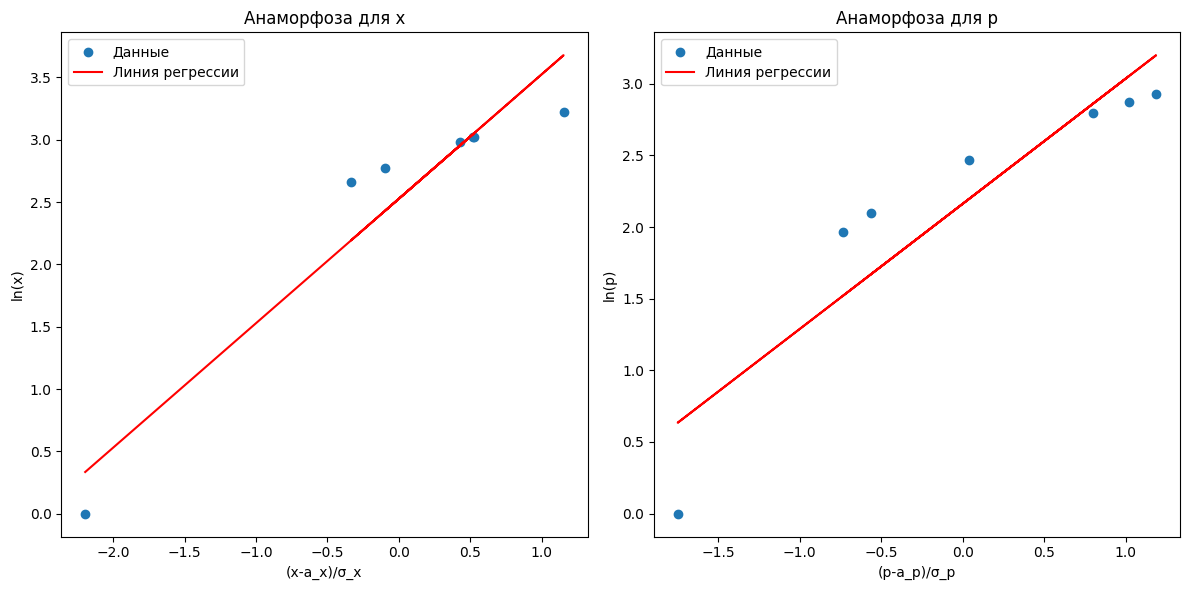

Коэффициент детерминации для x: 0.9129699220289619
Коэффициент детерминации для p: 0.8470314858316577
Распределение x нормальное
Распределение p нормальное


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import random


with open('1.txt', 'r') as file:
    data1 = file.readlines()
    data1 = [float(line.strip()) for line in data1]


x = data1
p = data1

random_indices_x = random.sample(range(len(x)), 7)
random_indices_p = random.sample(range(len(p)), 7)

x_sample = [x[i] for i in random_indices_x]
p_sample = [p[i] for i in random_indices_p]

min_x = min(x_sample)
if min_x <= 0:
    x_sample = [xi - min_x + 1 for xi in x_sample]

min_p = min(p_sample)
if min_p <= 0:
    p_sample = [pi - min_p + 1 for pi in p_sample]

a_x = np.mean(x_sample)
sigma_x = np.std(x_sample)
ln_x = np.log(x_sample)
x_transformed = (x_sample - a_x) / sigma_x

slope_x, intercept_x, r_value_x, p_value_x, std_err_x = linregress(x_transformed, ln_x)
regression_line_x = slope_x * x_transformed + intercept_x

a_p = np.mean(p_sample)
sigma_p = np.std(p_sample)
ln_p = np.log(p_sample)
p_transformed = (p_sample - a_p) / sigma_p

slope_p, intercept_p, r_value_p, p_value_p, std_err_p = linregress(p_transformed, ln_p)
regression_line_p = slope_p * p_transformed + intercept_p

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x_transformed, ln_x, label='Данные')
plt.plot(x_transformed, regression_line_x, color='red', label='Линия регрессии')
plt.title('Анаморфоза для x')
plt.xlabel('(x-a_x)/σ_x')
plt.ylabel('ln(x)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(p_transformed, ln_p, label='Данные')
plt.plot(p_transformed, regression_line_p, color='red', label='Линия регрессии')
plt.title('Анаморфоза для p')
plt.xlabel('(p-a_p)/σ_p')
plt.ylabel('ln(p)')
plt.legend()

plt.tight_layout()
plt.show()

print(f'Коэффициент детерминации для x: {r_value_x**2}')
print(f'Коэффициент детерминации для p: {r_value_p**2}')

if r_value_x**2 > 0.8:
    print("Распределение x нормальное")
else:
    print("Распределение x не нормальное")

if r_value_p**2 > 0.8:
    print("Распределение p нормальное")
else:
    print("Распределение p не нормальное")


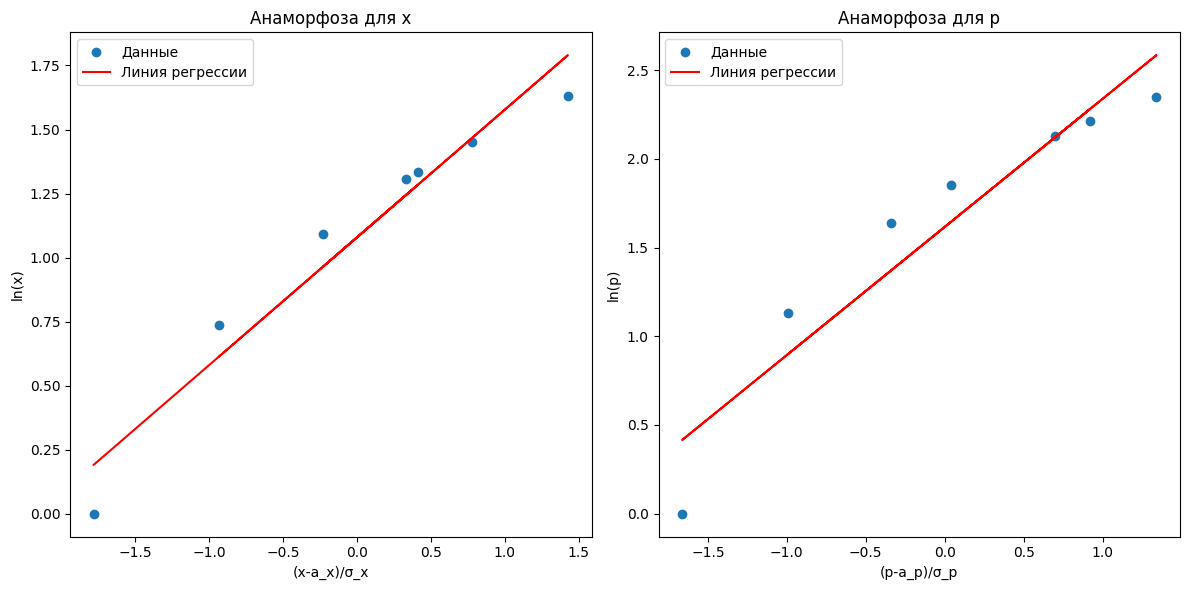

Коэффициент детерминации для x: 0.9454602158333558
Коэффициент детерминации для p: 0.9003444192448952
Распределение x нормальное
Распределение p нормальное


In [ ]:

with open('4.txt', 'r') as file:
    data1 = file.readlines()
    data1 = [float(line.strip()) for line in data1]

x = data1
p = data1

random_indices_x = random.sample(range(len(x)), 7)
random_indices_p = random.sample(range(len(p)), 7)

x_sample = [x[i] for i in random_indices_x]
p_sample = [p[i] for i in random_indices_p]

min_x = min(x_sample)
if min_x <= 0:
    x_sample = [xi - min_x + 1 for xi in x_sample]

min_p = min(p_sample)
if min_p <= 0:
    p_sample = [pi - min_p + 1 for pi in p_sample]

a_x = np.mean(x_sample)
sigma_x = np.std(x_sample)
ln_x = np.log(x_sample)
x_transformed = (x_sample - a_x) / sigma_x

slope_x, intercept_x, r_value_x, p_value_x, std_err_x = linregress(x_transformed, ln_x)
regression_line_x = slope_x * x_transformed + intercept_x

a_p = np.mean(p_sample)
sigma_p = np.std(p_sample)
ln_p = np.log(p_sample)
p_transformed = (p_sample - a_p) / sigma_p

slope_p, intercept_p, r_value_p, p_value_p, std_err_p = linregress(p_transformed, ln_p)
regression_line_p = slope_p * p_transformed + intercept_p

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x_transformed, ln_x, label='Данные')
plt.plot(x_transformed, regression_line_x, color='red', label='Линия регрессии')
plt.title('Анаморфоза для x')
plt.xlabel('(x-a_x)/σ_x')
plt.ylabel('ln(x)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(p_transformed, ln_p, label='Данные')
plt.plot(p_transformed, regression_line_p, color='red', label='Линия регрессии')
plt.title('Анаморфоза для p')
plt.xlabel('(p-a_p)/σ_p')
plt.ylabel('ln(p)')
plt.legend()

plt.tight_layout()
plt.show()

print(f'Коэффициент детерминации для x: {r_value_x**2}')
print(f'Коэффициент детерминации для p: {r_value_p**2}')

if r_value_x**2 > 0.8:
    print("Распределение x нормальное")
else:
    print("Распределение x не нормальное")

if r_value_p**2 > 0.8:
    print("Распределение p нормальное")
else:
    print("Распределение p не нормальное")

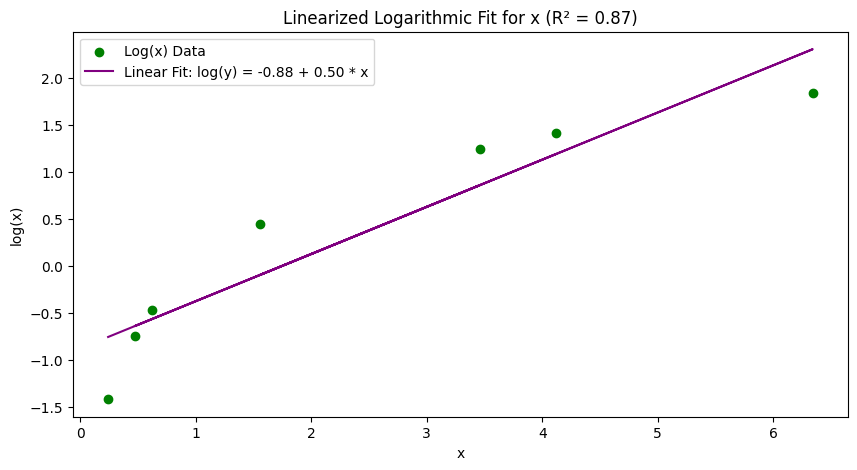

Коэффициенты экспоненциальной регрессии для x: a = 0.42, b = 0.50
Коэффициент детерминации R² для x: 0.87
Распределение x экспоненциальное


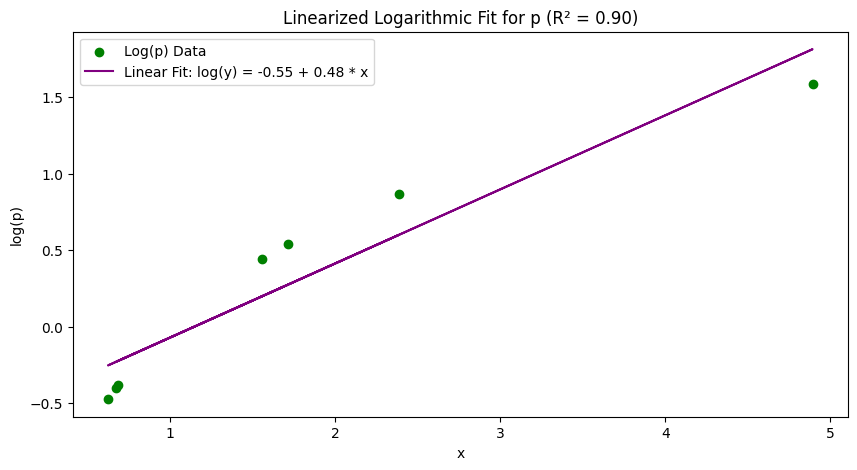

Коэффициенты экспоненциальной регрессии для p: a = 0.57, b = 0.48
Коэффициент детерминации R² для p: 0.90
Распределение p экспоненциальное


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import random

with open('3.txt', 'r') as file:
    data1 = file.readlines()
    data1 = [float(line.strip()) for line in data1]

x = data1
p = data1

random_indices_x = random.sample(range(len(x)), 7)
random_indices_p = random.sample(range(len(p)), 7)

x_sample = [x[i] for i in random_indices_x]
p_sample = [p[i] for i in random_indices_p]

def exponential_regression(x_sample, y_sample, label):
    log_y_sample = np.log(y_sample)

    slope, intercept, r_value, p_value, std_err = linregress(x_sample, log_y_sample)

    a = np.exp(intercept)
    b = slope

    x_fit = np.linspace(min(x_sample), max(x_sample), 100)
    y_fit = a * np.exp(b * x_fit)

    r_squared = r_value**2

    plt.figure(figsize=(10, 5))
    plt.scatter(x_sample, log_y_sample, color='green', label=f'Log({label}) Data')

    plt.plot(x_sample, intercept + slope * np.array(x_sample), color='purple', label=f'Linear Fit: log(y) = {intercept:.2f} + {slope:.2f} * x')

    plt.xlabel('x')
    plt.ylabel(f'log({label})')
    plt.title(f'Linearized Logarithmic Fit for {label} (R² = {r_squared:.2f})')
    plt.legend()
    plt.show()

    print(f"Коэффициенты экспоненциальной регрессии для {label}: a = {a:.2f}, b = {b:.2f}")
    print(f"Коэффициент детерминации R² для {label}: {r_squared:.2f}")
    if r_squared > 0.8:
        print(f"Распределение {label} экспоненциальное")
    else:
        print(f"Распределение {label} не экспоненциальное")

exponential_regression(x_sample, x_sample, 'x')
exponential_regression(p_sample, p_sample, 'p')

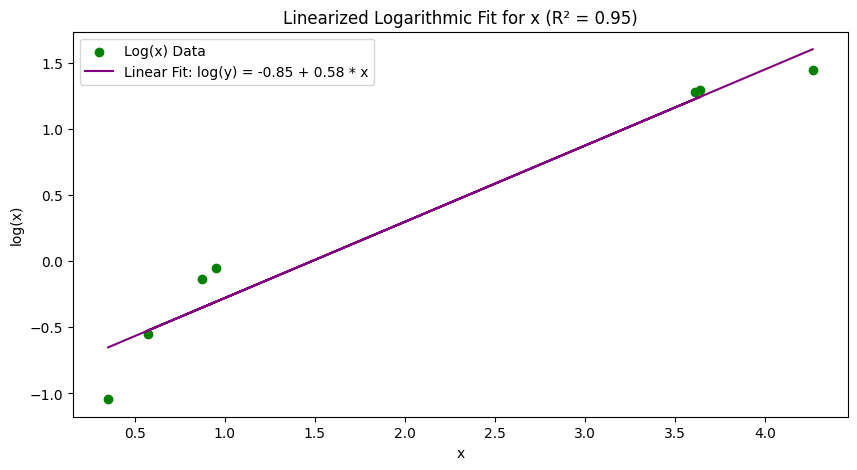

Коэффициенты экспоненциальной регрессии для x: a = 0.43, b = 0.58
Коэффициент детерминации R² для x: 0.95
Распределение x экспоненциальное


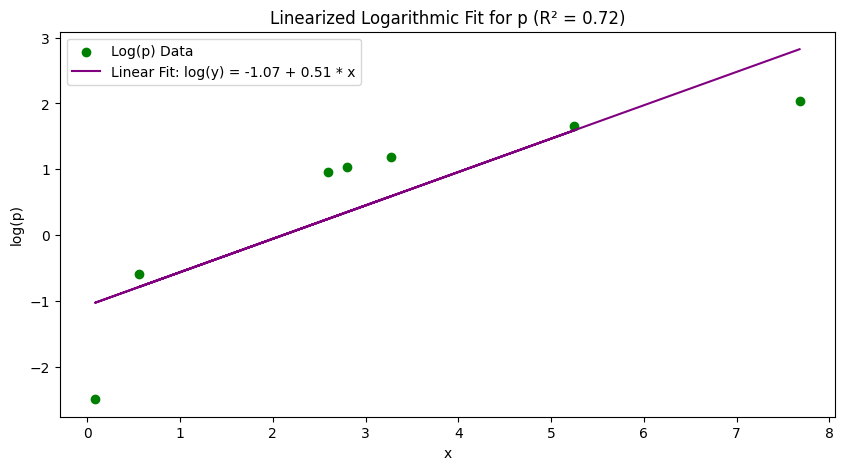

Коэффициенты экспоненциальной регрессии для p: a = 0.34, b = 0.51
Коэффициент детерминации R² для p: 0.72
Распределение p не экспоненциальное


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import random

with open('6.txt', 'r') as file:
    data1 = file.readlines()
    data1 = [float(line.strip()) for line in data1]

x = data1
p = data1

random_indices_x = random.sample(range(len(x)), 7)
random_indices_p = random.sample(range(len(p)), 7)

x_sample = [x[i] for i in random_indices_x]
p_sample = [p[i] for i in random_indices_p]

def exponential_regression(x_sample, y_sample, label):
    log_y_sample = np.log(y_sample)

    slope, intercept, r_value, p_value, std_err = linregress(x_sample, log_y_sample)

    a = np.exp(intercept)
    b = slope

    x_fit = np.linspace(min(x_sample), max(x_sample), 100)
    y_fit = a * np.exp(b * x_fit)

    r_squared = r_value**2

    plt.figure(figsize=(10, 5))
    plt.scatter(x_sample, log_y_sample, color='green', label=f'Log({label}) Data')

    plt.plot(x_sample, intercept + slope * np.array(x_sample), color='purple', label=f'Linear Fit: log(y) = {intercept:.2f} + {slope:.2f} * x')

    plt.xlabel('x')
    plt.ylabel(f'log({label})')
    plt.title(f'Linearized Logarithmic Fit for {label} (R² = {r_squared:.2f})')
    plt.legend()
    plt.show()

    print(f"Коэффициенты экспоненциальной регрессии для {label}: a = {a:.2f}, b = {b:.2f}")
    print(f"Коэффициент детерминации R² для {label}: {r_squared:.2f}")
    if r_squared > 0.8:
        print(f"Распределение {label} экспоненциальное")
    else:
        print(f"Распределение {label} не экспоненциальное")

exponential_regression(x_sample, x_sample, 'x')
exponential_regression(p_sample, p_sample, 'p')